In [ ]:
!tensorboard --logdir=./log/ --host http://101.101.219.69 --port 6009

In [1]:
'''
original code source : https://www.kaggle.com/aidapearson/eda-starter-notebook
'''

'\noriginal code source : https://www.kaggle.com/aidapearson/eda-starter-notebook\n'

In [1]:
%matplotlib inline
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image

In [2]:
import matplotlib.image as mpimg

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
def create_data_frame(default_image_path:str,data_path:str,level_path:str,source_path:str):
    data = {}
    data['latex'] = []
    data['latex_str']=[] # 추가 1
    data['seq_len'] = []
    data['aspect_ratio'] = []
    data['image_width'] = []
    data['image_height'] = []
    data['level']=[]
    data['source']=[]
    data['img_name']=[] # 추가 2
    all_latex_list = []
    lv1_latex_list=[]
    lv2_latex_list=[]
    lv3_latex_list=[]
    lv4_latex_list=[]
    lv5_latex_list=[]
    invisible_list=[]
    with open(level_path) as f:
        level_info={}
        for line in f:
            path,level=line.replace("\n","").split("\t")
            level_info[path]=int(level)
            data['img_name'].append(path) # 추가 3
            
    with open(source_path) as f:
        source_info={}
        for line in f:
            path,source=line.replace("\n","").split("\t")
            source_info[path]=str(source)
            
    with open(data_path) as f:
        for idx,line in enumerate(f):
            image_path,latex=line.replace("\n","").split("\t")
            image = Image.open(default_image_path+image_path)
            width, height = image.size
            data['aspect_ratio'].append(round(width / height,1))
            data['image_width'].append(int(width))
            data['image_height'].append(int(height))
            data['latex_str'].append(latex) # 추가 4
            latex=latex.split(" ")
            if "\left." in latex or "\right." in latex:
                invisible_list.append(idx)
            data['latex'].append(latex)
            data['seq_len'].append(len(latex))
            level=level_info[image_path]
            data['level'].append(level)
            source=source_info[image_path]
            data['source'].append(source)
            all_latex_list += latex
            if level==1:
                lv1_latex_list += latex
            elif level==2:
                lv2_latex_list += latex
            elif level==3:
                lv3_latex_list += latex
            elif level==4:
                lv4_latex_list += latex
            else:
                lv5_latex_list += latex
    df = pd.DataFrame.from_dict(data)
    lv_latex_list=[lv1_latex_list,lv2_latex_list,lv3_latex_list,lv4_latex_list,lv5_latex_list]
    return df, all_latex_list,lv_latex_list, invisible_list

In [11]:
default_image_path="/opt/ml/input/data/train_dataset/images/"

def latex_to_img(img_num:int):
    a = df.iloc[img_num]['latex_str']
    ax = plt.axes([0,0,0.2,0.2]) #left,bottom,width,height
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    plt.text(0.3,0.5,'$%s$' %a, size=35,color="green")
    plt.show()

def origin_img(img_num:int):
    img_name = df.iloc[img_num]['img_name']
    img = mpimg.imread(default_image_path+img_name)
    plt.grid(True, color='w')
    plt.imshow(img)
    plt.show()

def compare_img_gt(img_num:int, visible_infos=False):
    # original img
    origin_img(img_num)
    
#     box1 = {'boxstyle': 'round',
#         'ec': (0.5, 0.3, 0.3), # edgecolor
#         'fc': (0.5, 0.8, 0.8)} # facecolor
    # 변경 ============================================================
    level_color=[
        'turquoise',
        'lightgreen',
        'gold',
        'sandybrown',
        'salmon'
    ]

    box1 = {'boxstyle': 'round',
        'ec': (0.1, 0.1, 0.1), # edgecolor
        'fc': level_color[int(df.iloc[img_num]['level'])]} # (0.5, 0.8, 0.8)} # facecolor
    # ===================================================================
    # ground truth latex to img
    latex_to_img(img_num)
    
    if visible_infos:
        display(df.iloc[img_num][1:])

In [15]:
df, all_latex_list, lv_latex_list, invisible_list = create_data_frame(
    default_image_path="/opt/ml/input/data/train_dataset/images/",
    data_path="/opt/ml/input/data/train_dataset/gt.txt",
    level_path="/opt/ml/input/data/train_dataset/level.txt",
    source_path="/opt/ml/input/data/train_dataset/source.txt"
)

In [7]:
df.columns

Index(['latex', 'latex_str', 'seq_len', 'aspect_ratio', 'image_width',
       'image_height', 'level', 'source', 'img_name'],
      dtype='object')

In [8]:
df.describe()

,seq_len,aspect_ratio,image_width,image_height,level
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,17.536930,4.344388,1309.317910,333.098100,2.392250
std,14.952702,2.484526,1120.911322,312.306097,0.845575
min,1.000000,0.100000,35.000000,20.000000,1.000000
25%,7.000000,2.600000,563.000000,173.000000,2.000000
50%,13.000000,3.800000,1012.000000,255.000000,2.000000
75%,23.000000,5.500000,1732.000000,393.000000,3.000000
max,252.000000,33.900000,11810.000000,10020.000000,5.000000


In [19]:
df.head()

,latex,latex_str,seq_len,aspect_ratio,image_width,image_height,level,source,img_name
0,"[4, \times, 7, =, 2, 8]",4 \times 7 = 2 8,6,4.2,903,213,1,1,train_00000.jpg
1,"[a, ^, {, x, }, >, q]",a ^ { x } > q,7,3.7,435,118,2,0,train_00001.jpg
2,"[8, \times, 9]",8 \times 9,3,2.0,348,172,2,0,train_00002.jpg
3,"[\sum, _, {, k, =, 1, }, ^, {, n, -, 1, }, b, ...",\sum _ { k = 1 } ^ { n - 1 } b _ { k } = a _ {...,30,3.2,964,299,3,1,train_00003.jpg
4,"[I, =, d, q, /, d, t]",I = d q / d t,7,3.4,700,208,4,0,train_00004.jpg


====================== print all ========================== 


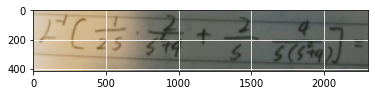

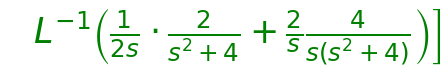

latex_str       \left. L ^ { - 1 } \left( \frac { 1 } { 2 s } ...
seq_len                                                        56
aspect_ratio                                                  5.5
image_width                                                  2300
image_height                                                  415
level                                                           3
source                                                          1
img_name                                          train_00280.jpg
Name: 280, dtype: object

In [18]:
num = invisible_list[1]
# print("==================== print latex to img ==================== ")
# latex_to_img(img_num=num) # 출력하고싶은 수식의 번호(TeX plot)

# print("===================== print origin img ==================== ")
# origin_img(img_num=num) # 원본 이미지 출력

print("====================== print all ========================== ")
compare_img_gt(img_num=num, visible_infos=True) # 원본 이미지, 정답 수식, 데이터 정보(True 설정 시)